- Pillow = Python Image Library
- we use PIL to import

In [1]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw, ImageFont

In [2]:
import cv2

In [3]:
print(dir(cv2))

['ACCESS_FAST', 'ACCESS_MASK', 'ACCESS_READ', 'ACCESS_RW', 'ACCESS_WRITE', 'ADAPTIVE_THRESH_GAUSSIAN_C', 'ADAPTIVE_THRESH_MEAN_C', 'AGAST_FEATURE_DETECTOR_AGAST_5_8', 'AGAST_FEATURE_DETECTOR_AGAST_7_12D', 'AGAST_FEATURE_DETECTOR_AGAST_7_12S', 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION', 'AGAST_FEATURE_DETECTOR_OAST_9_16', 'AGAST_FEATURE_DETECTOR_THRESHOLD', 'AKAZE', 'AKAZE_DESCRIPTOR_KAZE', 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT', 'AKAZE_DESCRIPTOR_MLDB', 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT', 'AKAZE_create', 'AffineFeature', 'AffineFeature_create', 'AffineTransformer', 'AgastFeatureDetector', 'AgastFeatureDetector_AGAST_5_8', 'AgastFeatureDetector_AGAST_7_12d', 'AgastFeatureDetector_AGAST_7_12s', 'AgastFeatureDetector_NONMAX_SUPPRESSION', 'AgastFeatureDetector_OAST_9_16', 'AgastFeatureDetector_THRESHOLD', 'AgastFeatureDetector_create', 'Algorithm', 'AlignExposures', 'AlignMTB', 'AsyncArray', 'BFMatcher', 'BFMatcher_create', 'BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', '

# Verifying Images we just imported

In [2]:
import os

In [3]:
os.listdir()

['aws.png', 'bg.jpg', 'DevOps.png', 'Image_processing.ipynb', 'Nasa.png']

In [6]:
im1 = Image.open('aws.png')
im2 = Image.open('bg.jpg')
im3 = Image.open('DevOps.png')
im4 = Image.open('Nasa.png')

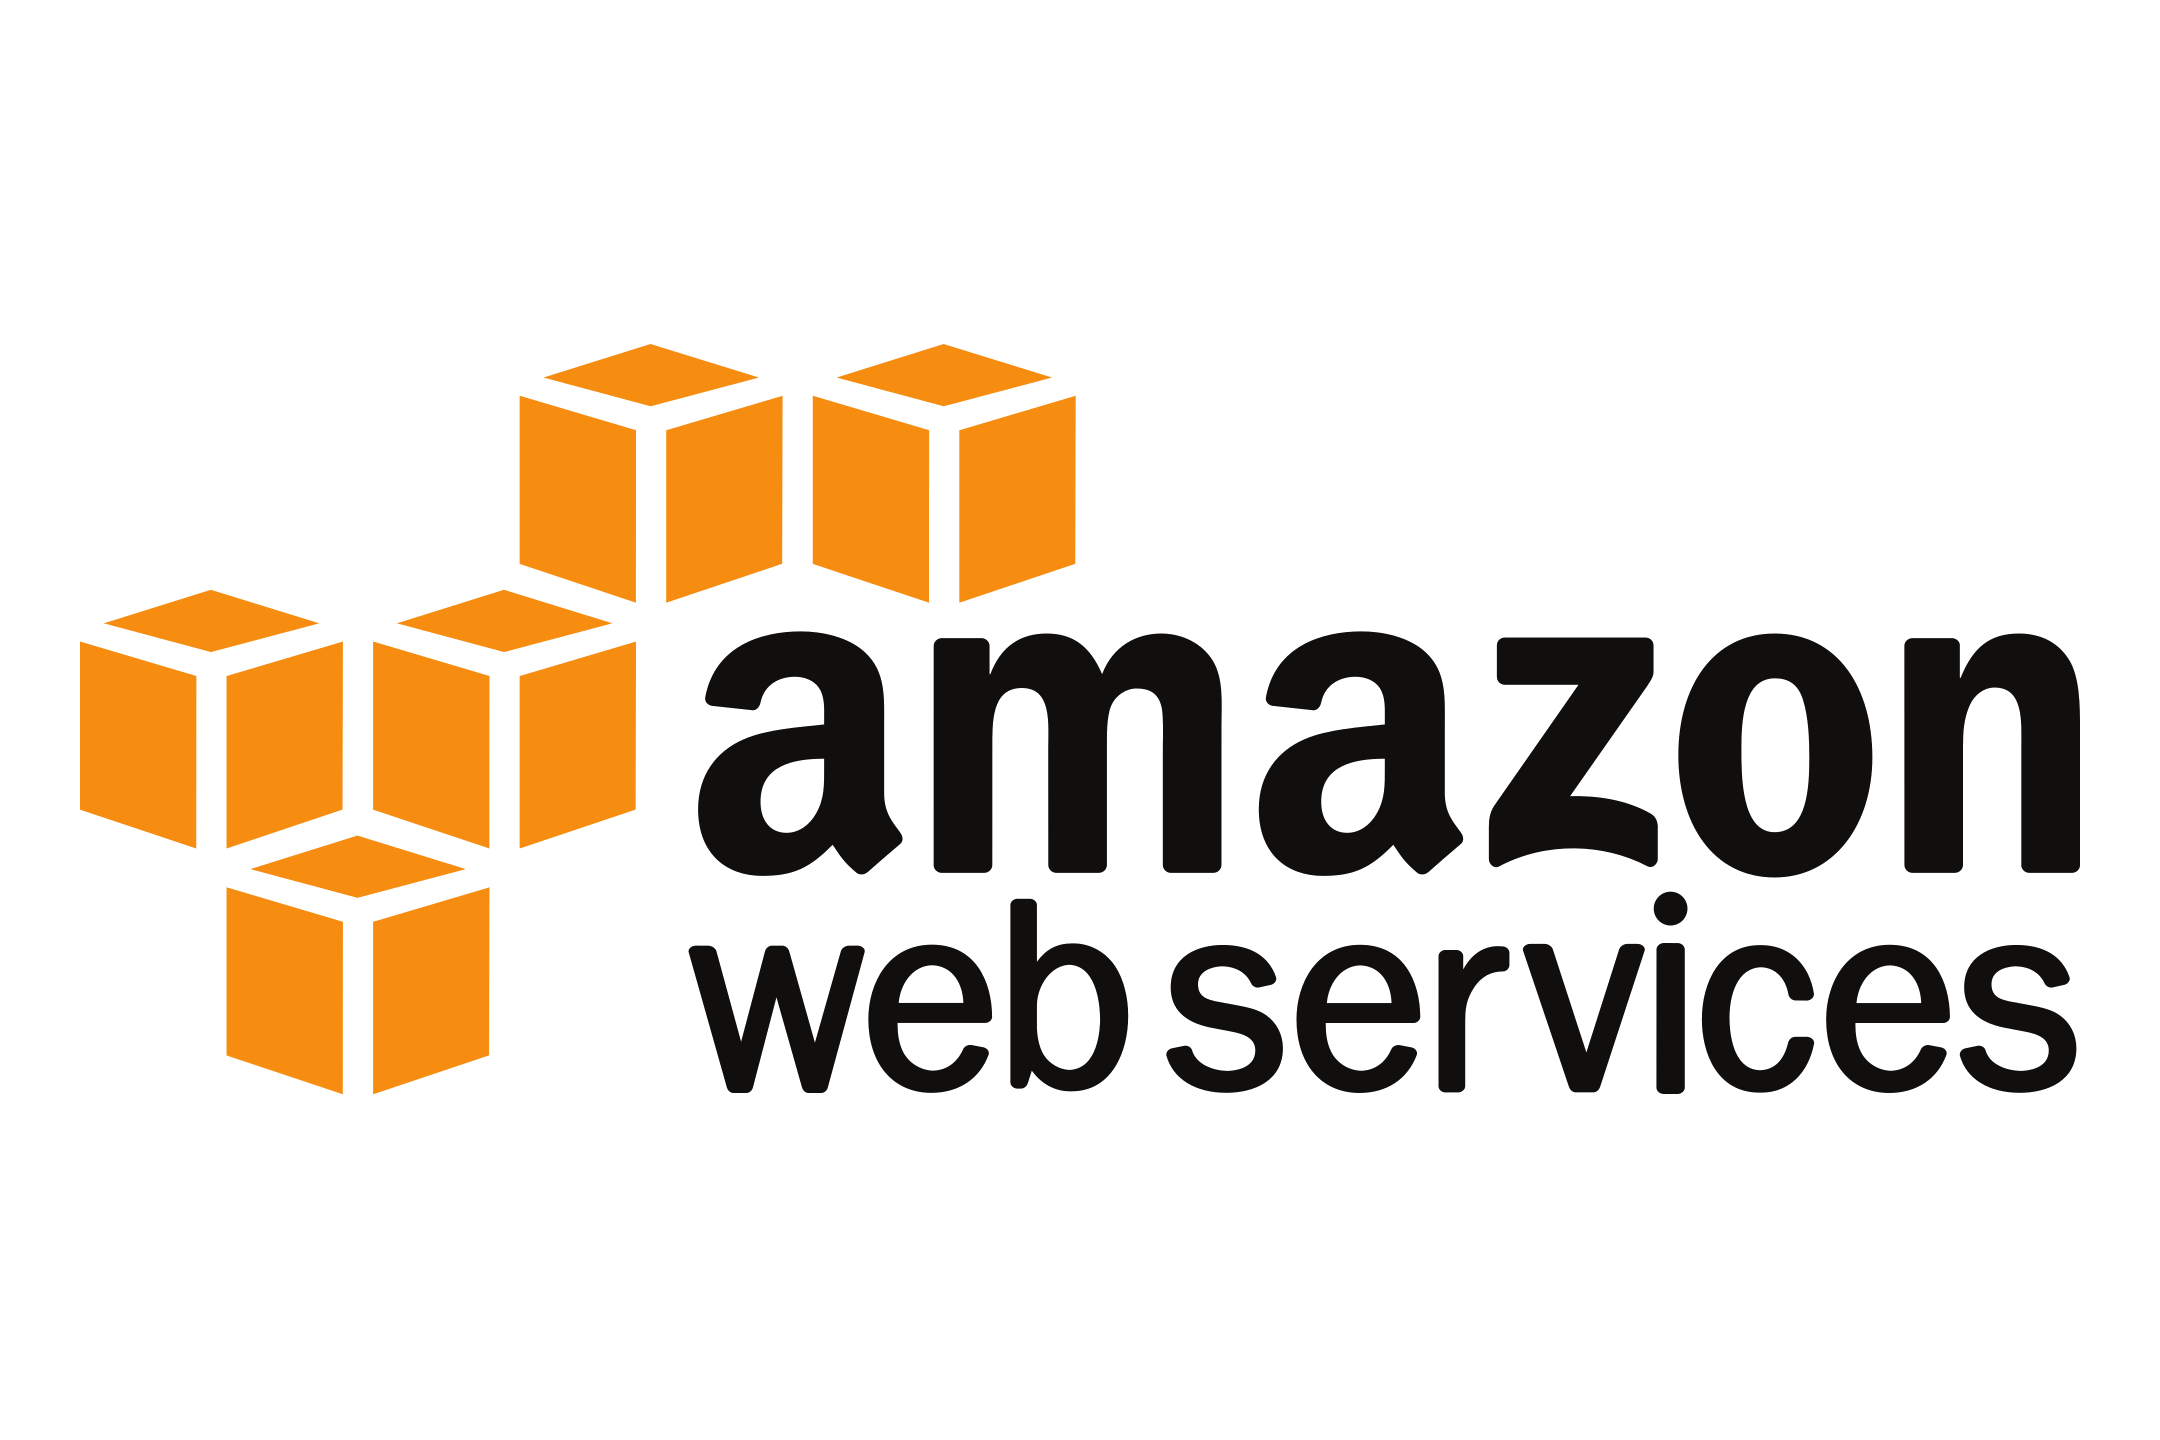

In [8]:
im1

# Print Image details

In [9]:
print(f'Format:{im1.format}')
print(f'Mode:{im1.mode}')
print(f'Size:{im1.size}')
print(f'info:{im1.info}')


Format:PNG
Mode:RGBA
Size:(2160, 1440)
info:{'interlace': 1, 'Software': 'Adobe ImageReady', 'XML:com.adobe.xmp': '<?xpacket begin="\ufeff" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c138 79.159824, 2016/09/14-01:09:01        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmp:CreatorTool="Adobe Photoshop CC 2017 (Macintosh)" xmpMM:InstanceID="xmp.iid:984EBE9BED4E11E7B7C38A8F05F825E8" xmpMM:DocumentID="xmp.did:984EBE9CED4E11E7B7C38A8F05F825E8"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:984EBE99ED4E11E7B7C38A8F05F825E8" stRef:documentID="xmp.did:984EBE9AED4E11E7B7C38A8F05F825E8"/> </rdf:Description> </rdf:RDF> </x:xmpmeta> <?xpacket end="r"?>'}


# Resizing Image

### Making it 3X

In [11]:
h = im1.height
w = im1.width
# scaling to 3

im1_bigger = im1.resize((w*3,h*3))
im1_bigger.show()

### Making it 1/3

In [13]:
aws_logo = im1.resize((im1.width//3,im1.height//3)) # reduce size by 1/3
aws_logo.show()

### Rotating

In [ ]:
im2.rotate(90)

In [ ]:
im2.rotate(90, expand = True)

In [ ]:
im2.rotate(45, expand = True, fillcolor='white')

# Saving the image
- aws rotated 

In [20]:
im1.rotate(45, expand = True, fillcolor='white').save('aws_rotated.png')

# Transpose (splitting Image)

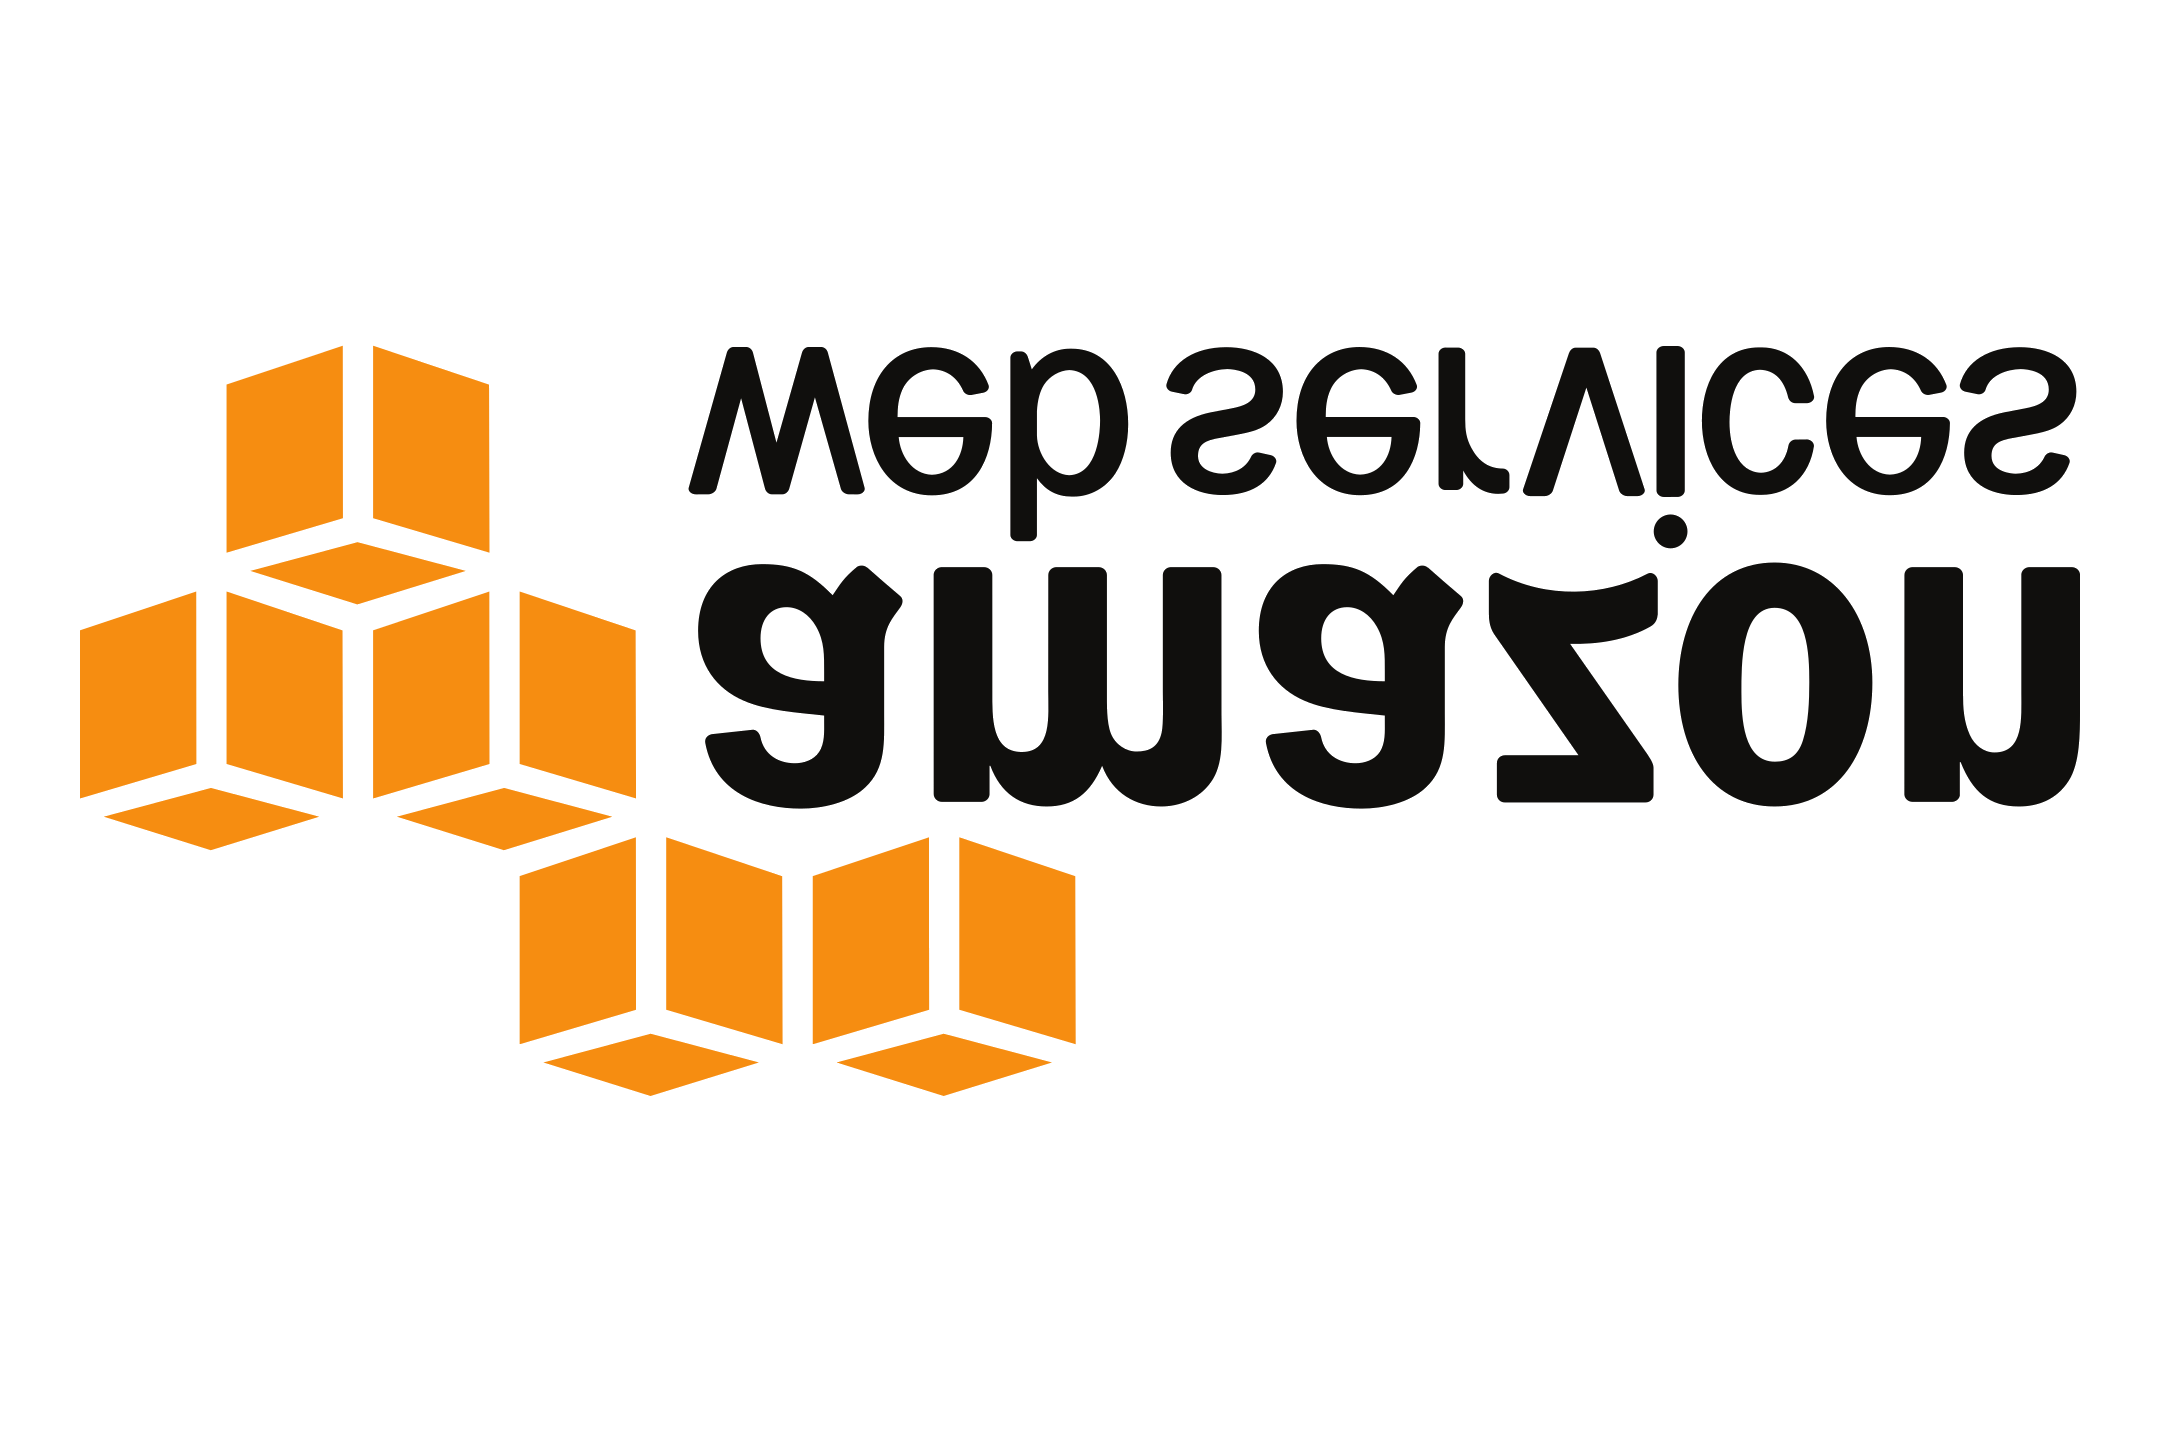

In [21]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

# Merging Logo

- Firste resize the logo/image to be pasted
- Then use paste Function

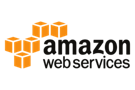

In [30]:
w,h= aws_logo.width,aws_logo.height
aws_logo = aws_logo.resize((w//2,h//2))
aws_logo

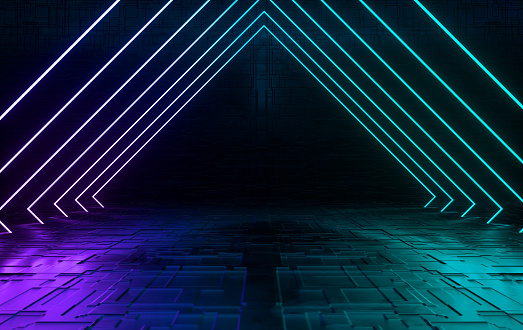

In [31]:
wallpaper = im2.copy()
wallpaper

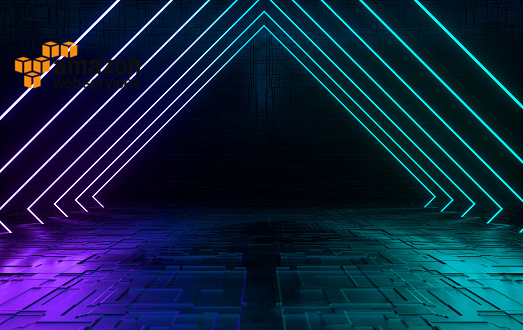

In [32]:
wallpaper.paste(aws_logo,(10,20),mask = aws_logo)
wallpaper

# Cropping Image

In [ ]:
im4

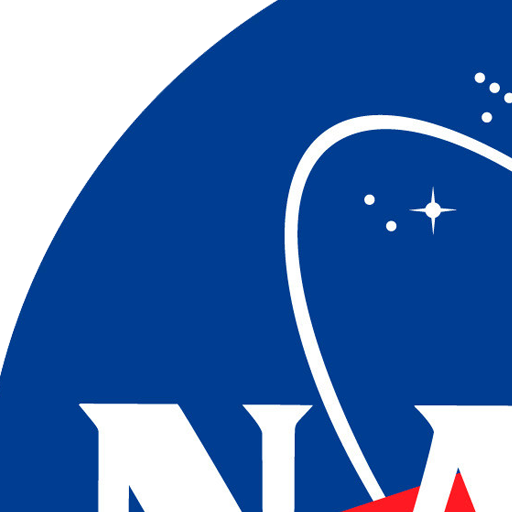

In [37]:
im4.crop((100,100,612,612))

## Blending

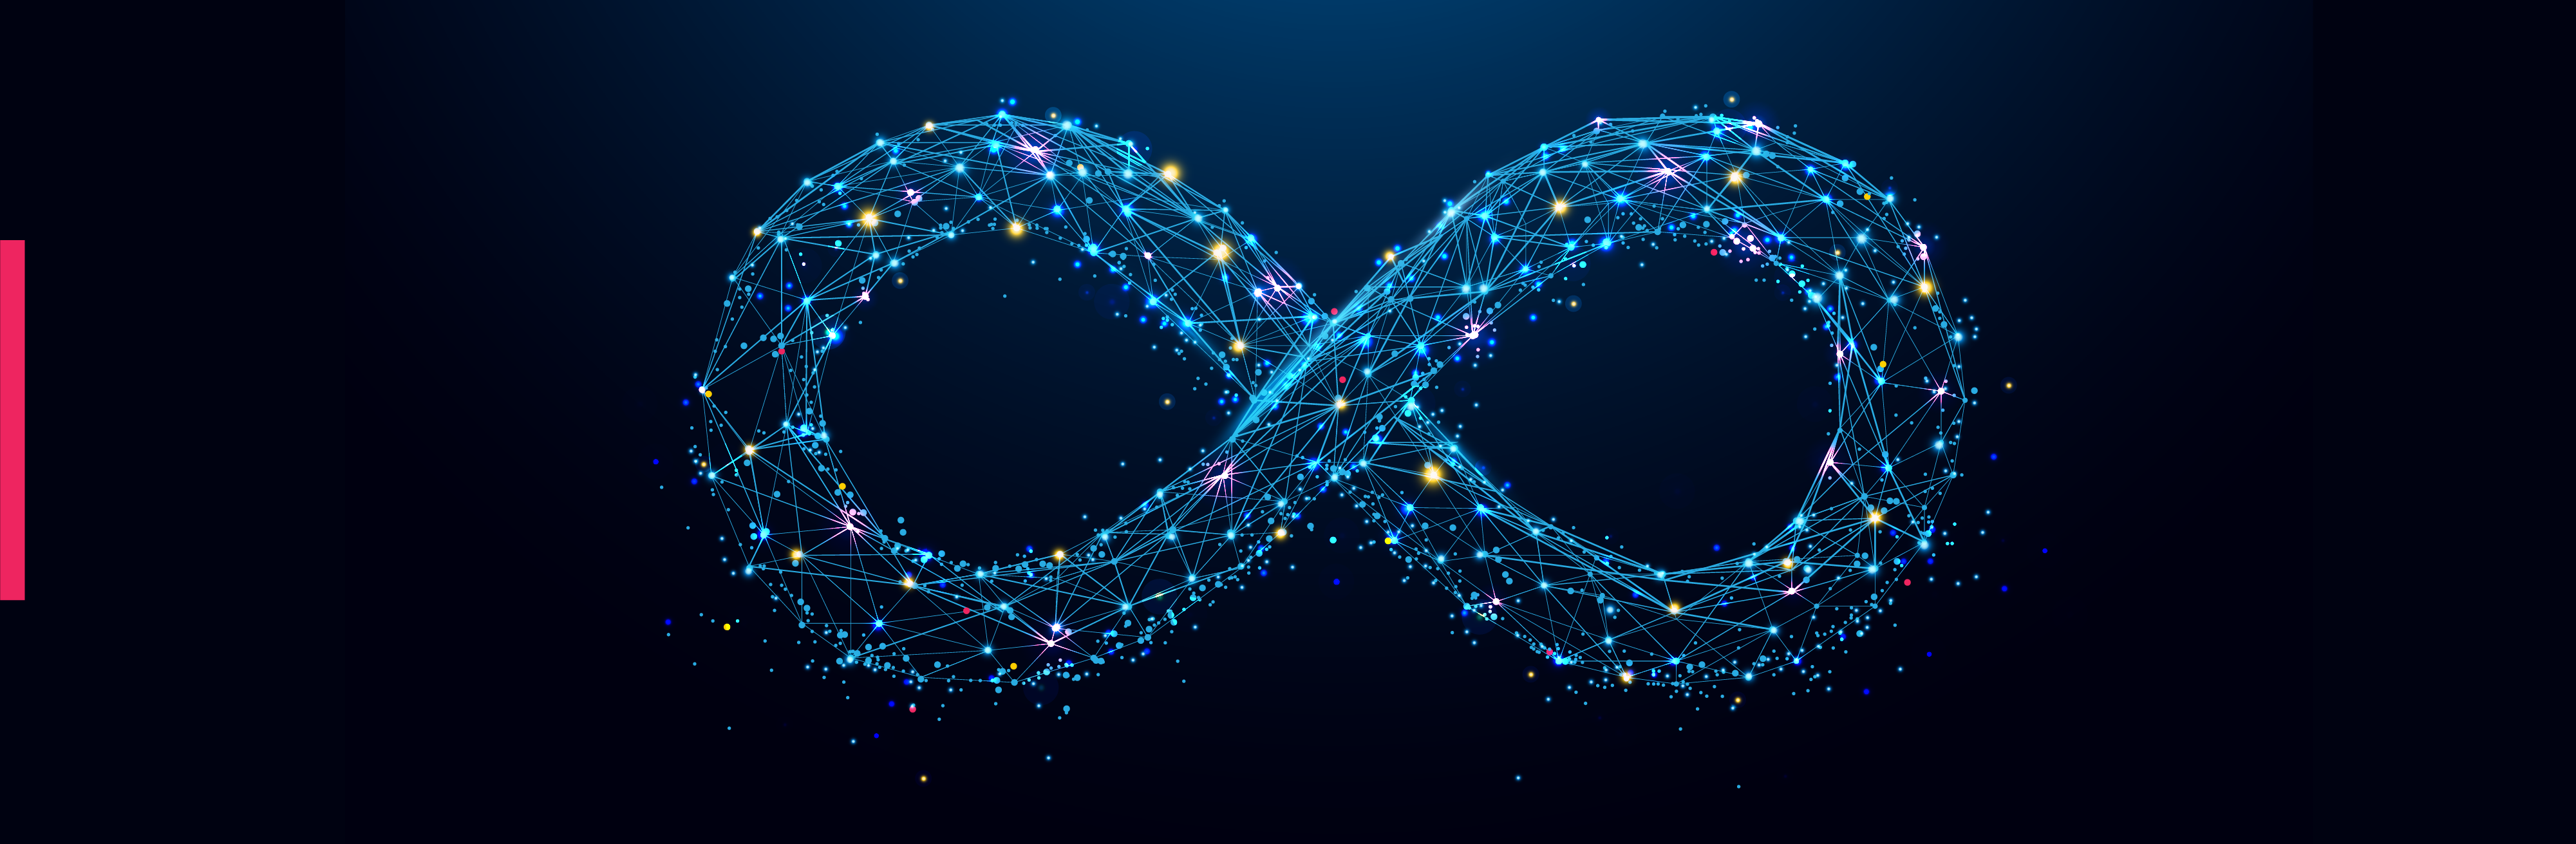

In [38]:
im3

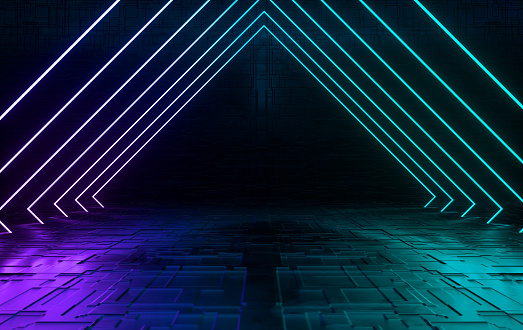

In [40]:
im2

In [50]:
a = im3.resize((im2.height,im1.width))
b = im2.copy()
a= a.convert('RGB')
b= b.convert('RGB')

In [ ]:
Image.blend(a,b,0.2)

# Applying Filters to image and saving in 'generated' directory

In [55]:
filters=[
    ImageFilter.BLUR,
     ImageFilter.CONTOUR,
      ImageFilter.DETAIL,
       ImageFilter.EDGE_ENHANCE,
        ImageFilter.EDGE_ENHANCE_MORE,
         ImageFilter.EMBOSS,
          ImageFilter.FIND_EDGES,
           ImageFilter.SMOOTH,
            ImageFilter.SMOOTH_MORE,
             ImageFilter.SHARPEN,
]
for i,f in enumerate(filters):
    im2.filter(f).save(f'generated/filter_{i}.png')

In [58]:
im2.filter(ImageFilter.MaxFilter(7)).show()
im2.filter(ImageFilter.MinFilter(7)).show()
im2.filter(ImageFilter.ModeFilter(7)).show()
im2.filter(ImageFilter.MedianFilter(7)).show()
im2.filter(ImageFilter.GaussianBlur(7)).show()

# Enhancing Images

In [62]:
enImg1 = ImageEnhance.Color(im1)
enImg1.enhance(-1).show()

In [64]:
for i in range(-10,11):
    enImg1.enhance(i).save(f'generated/colorboost_{i}.png')

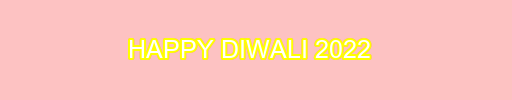

In [65]:
im7=Image.new('RGBA',(512,100),(250,100,100,100))
msg="HAPPY DIWALI 2022"
font="arial.ttf"
fontsize=25
fontcolor='white'
font=font=ImageFont.truetype(font, fontsize)
pos=(512//4,35)
draw_im7=ImageDraw.Draw(im7)
draw_im7.text(pos,msg,fontcolor,font,align='center',stroke_width=2,stroke_fill='yellow')
im7